# Event Segmentation Analysis

The following notebook contains the formal analysis procedure for the hidden markov modeling of continuous fMRI data.

# A note on the imports

A good portion of this analysis is built on `decker_honors_module`, an installable "package" created specifically to streamline Will Decker's honors thesis project. Usage and notes on this code are located in the GitHub repo [here](https://github.com/w-decker/decker_honors_module). Other important dependencies include [Brainiak](brainiak.org) and [Nilearn](https://nilearn.github.io/stable/index.html). Some `conda` environments have been created to certain portions of the code. `.yml` files will be included and named according to their dedicated use. 

# Importing data

`decker.utils.io.io` contains a class, `BIDSio` created to handle the project's data in BIDS format. There is also a conda environment dedicated to just this procedure.

You only need to **run once!**

In [ ]:
!wget # add .yml
!conda create -f bidsio.yml
!conda activate bidio

In [1]:
# import BIDSio
from decker.utils.io.io import BIDSio

Get the data to the environment by showing `BIDSio` where the BIDS root is.

In [2]:
bids_root = "/data/jdecke5/projects/honors-thesis/data/bids"
bids = BIDSio(bids_path=bids_root)

# bind bids_root to BIDSio
bids.init()

BIDSio(bids_path='/data/jdecke5/projects/honors-thesis/data/bids')

Display some information about the BIDS dataset.

In [3]:
bids.info()

Subjects: 
	 ['SL001', 'SL002', 'SL003', 'SL004', 'SL005', 'SL006', 'SL007', 'SL008', 'SL009', 'SL010', 'SL011', 'SL012', 'SL013', 'SL014', 'SL015', 'SL016', 'SL017', 'SL018', 'SL019']

Total subjects: 
	 19

Tasks: 
	 ['rest', 'statlearning']

Total tasks: 
	 2



Get list of functional data.

In [4]:
data = bids.get_func(task='statlearning', suffix="bold")
data

['/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL001/func/sub-SL001_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL002/func/sub-SL002_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL003/func/sub-SL003_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL004/func/sub-SL004_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL005/func/sub-SL005_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projects/honors-thesis/data/bids/derivatives/sub-SL006/func/sub-SL006_task-statlearning_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/data/jdecke5/projec

We can ensure that we have to correct number of files by comparing output from `BIDSio.info()` and `BIDSio.ge_func()`.

# Importing participant database

`decker.utils.io.io` contains a function, `parse_pdb()`, which reads a file (either .xlsx or .csv) and transposes it based on a factor. So in this case, it transposes our data from wide to long by the conditions each participant belongs to.

In [5]:
from decker.utils.io.io import parse_pdb

In [6]:
db = "/data/jdecke5/projects/honors-thesis/data/participant_database.xlsx"
pps = parse_pdb(path=db, subid_col="Subject ID", cond_col="COND")

Let's see what this looks like.

In [7]:
pps

{'S': ['SL001',
  'SL003',
  'SL004',
  'SL007',
  'SL009',
  'SL011',
  'SL013',
  'SL015',
  'SL017',
  'SL019'],
 'R': ['SL002',
  'SL005',
  'SL006',
  'SL008',
  'SL010',
  'SL012',
  'SL014',
  'SL016',
  'SL018']}

You can see now that the subject IDs of each participant have been grouped by which condition they are in.

# Masking the data

This uses some functionality from `decker.analysis.utils.utils`.

In [8]:
# imports
from decker.analysis.utils.utils import nilearn_mask_single_data, nilearn_mask_group_by_condition

Demonstrating on one subject

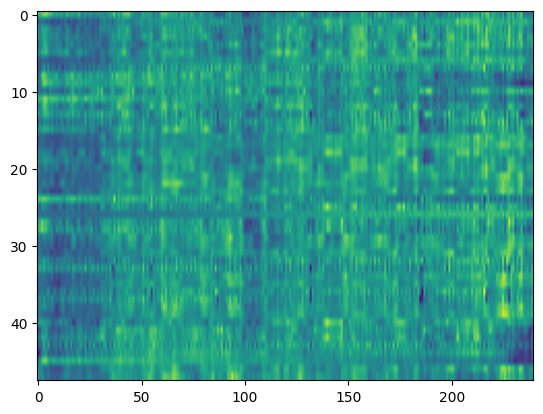

In [9]:
roidat, labels, report = nilearn_mask_single_data(atlas="cort-maxprob-thr25-1mm", file=data[0], report=True, plot=True)
report

Now let's do this for all subjects and parse the data by condition

In [29]:
roidata = nilearn_mask_group_by_condition(cond=pps, atlas="cort-maxprob-thr25-1mm", files=data)

Beginning masking procedure...
------------------------------

Masking: SL001 and adding to group: S 

Masking: SL003 and adding to group: S 

Masking: SL004 and adding to group: S 

Masking: SL007 and adding to group: S 

Masking: SL009 and adding to group: S 

Masking: SL011 and adding to group: S 

Masking: SL013 and adding to group: S 

Masking: SL015 and adding to group: S 

Masking: SL017 and adding to group: S 

Masking: SL019 and adding to group: S 

Masking: SL002 and adding to group: R 

Masking: SL005 and adding to group: R 

Masking: SL006 and adding to group: R 

Masking: SL008 and adding to group: R 

Masking: SL010 and adding to group: R 

Masking: SL012 and adding to group: R 

Masking: SL014 and adding to group: R 

Masking: SL016 and adding to group: R 

Masking: SL018 and adding to group: R 



Take a loot at `roidata`, a `dict` of `np.ndarray`s

Conditions: ['S', 'R']



Text(0.5, 0.98, 'Subject SL008')

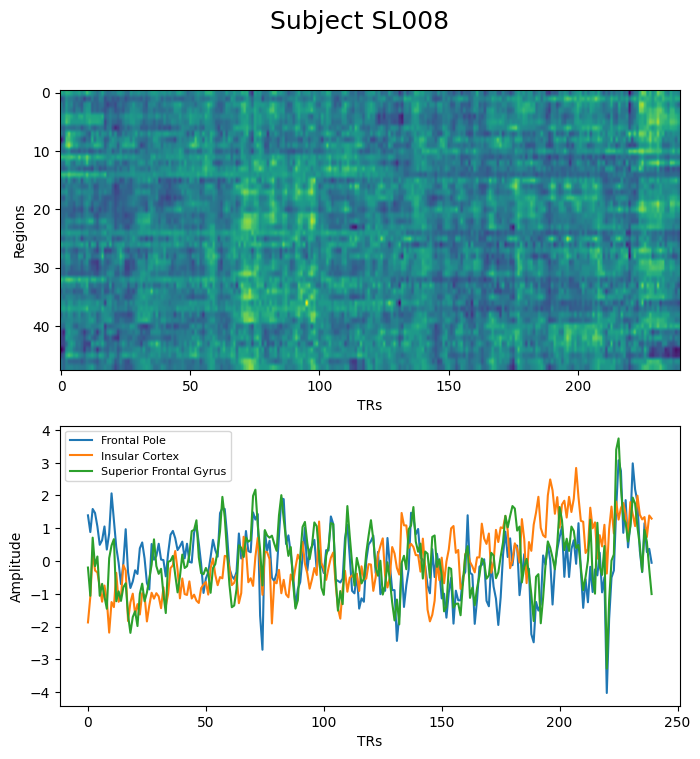

In [58]:
import matplotlib.pyplot as plt

print(f'Conditions: {list(roidata.keys())}\n')

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].imshow(roidata["R"][3].T, aspect='auto')
ax[0].set_xlabel("TRs")
ax[0].set_ylabel("Regions")

[ax[1].plot(roidata["R"][3][:, idx], label=labels[idx+1]) for idx in range(3)] # labels come from `nilearn_mask_single_data()`
ax[1].legend(loc=2, prop={'size': 8})
ax[1].set_xlabel("TRs")
ax[1].set_ylabel("Amplitude")

fig.suptitle(f"Subject {pps["R"][3]}", fontsize=18)

Looking at the ROI labels.

>Note `background` is not an ROI

In [56]:
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

# Formal model fitting procedure

As mentioned earlier, we are using `brainiak` to conduct our event segmentation analysis. This requires a separate `conda` environment